Lilianna Houston

Updated: 9/3/21

Gillespie Simulation 

Max Entropy Project

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

Basic Gillespie Simulation: We have two different reactions, A->B and B->A with rates k_f and k_b respectively. At time t = 0, we have n_a and n_b number of A and B molecules. The probability of each reaction, combined with a random reaction and random time variable, determine which reaction happens, when. As time progresses, the numbers of A and B molecules flucuate; sometimes forming a pattern.

## Example 2: oscillatory circuit 

In this example, we have 3 proteins: A, B and C each created by one of three genes: alpha, beta and gamma at a rate g. The proteins degrade at rate r. The proteins can bind to other genes to activate them. This creates an oscillatory circuit. We have 15 reactions. a1) A protein production, a2) A protein degradation, a3/a4) alpha/C binding deactivation, unbinging reactivation, a5) alpha solo reactivation, b1) B protein production, b2) B protein degradation, b3/b4) beta/A binding deactivation, unbinging reactivation, a5) beta solo reactivation, c1) C protein production, c2) C protein degradation, c3/c4) gamma/B binding deactivation, unbinging reactivation, c5) gamma solo reactivation

In [7]:
# CONSTANTS
# g = rate of protein production
g = 5.0*10**(-2) # 1/s
# r = rate of protein degradation / deactivated gene reactivation
r = 3.0*10**(-3) # 1/s
# f = binding deactivation rate
f = 5.0*10**(-1) # 1/s
# b = unbinding reactivation rate
b = 1.0*10**(-2) # 1/s

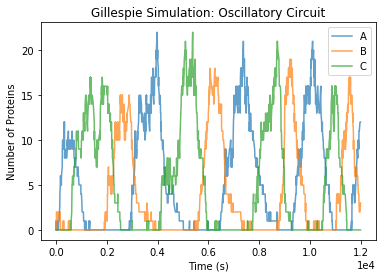

In [92]:
# INITIAL CONDITION of CHANGING VARIABLES

Apro = []
Bpro = []
Cpro = []

times = []

# A
# number of unactived gene
n_Ag_ua = 0
# number of actived gene
n_Ag_a = 1
# Number of Proteins
n_A = 0

# B
# number of unactived gene
n_Bg_ua = 0
# number of actived gene
n_Bg_a = 1
# Number of Proteins
n_B = 0

# C
# number of unactived gene
n_Cg_ua = 0
# number of actived gene
n_Cg_a = 1
# Number of Proteins
n_C = 0

base_time = 0

main(12000)
plot()

In [69]:
def main(max_time):
    global n_Ag_ua, n_Ag_a, n_A, n_Bg_ua, n_Bg_a, n_B, n_Cg_ua, n_Cg_a, n_C, base_time
    i = 0
    while base_time < max_time:
        # Random reaction variable
        rand_r = random.uniform(0, 1)
        # Random time variable
        rand_t = random.uniform(0, 1) 
        
        # A Propensities
        # 1) Protein production 
        a1 = n_Ag_a * g
        # 2) protein degradation
        a2 = n_A * r
        # 3) bonding deactivation 
        a3 = n_Ag_a * n_C * f  
        # 4) unbonding reactivation 
        a4 = n_Ag_ua * b
        # 5) solo reactivation 
        a5 = n_Ag_ua * r
        
        # B Propensities
        # 1) Protein production 
        b1 = n_Bg_a * g
        # 2) protein degradation
        b2 = n_B * r
        # 3) bonding deactivation 
        b3 = n_Bg_a * n_A * f  
        # 4) unbonding reactivation 
        b4 = n_Bg_ua * b
        # 5) solo reactivation 
        b5 = n_Bg_ua * r
        
        # C Propensities
        # 1) Protein production 
        c1 = n_Cg_a * g
        # 2) protein degradation
        c2 = n_C * r
        # 3) bonding deactivation 
        c3 = n_Cg_a * n_B * f  
        # 4) unbonding reactivation 
        c4 = n_Cg_ua * b
        # 5) solo reactivation 
        c5 = n_Cg_ua * r        
        
        # Def vector of propensities
        props = np.array([a1, a2, a3, a4, a5, 
                          b1, b2, b3, b4, b5, 
                          c1, c2, c3, c4, c5,])
        # Def vector of probabilities
        probs = props/np.sum(props) 
        # Calculate random time
        time = 1/(np.sum(props))*np.log(1/rand_t)
        #time = 60
        base_time += time
        
        react = deter_reaction(rand_r, probs)
        
        if react != 0:
            reaction_switch(react)
        #print ("i:", i, "unactive gene:", n_g_ua, "active gene:", n_g_a, "proteins:", n_a, "dimers:", n_a2)        
        Apro.append(n_A)
        Bpro.append(n_B)
        Cpro.append(n_C)

        times.append(base_time)
        i += 1
        
    #print ("proteins:", Apro, Bpro, Cpro)
    #print ("base_time:", times)

In [17]:
# Probability Generator (useless tbh)
def prob_gen(prop):
    p = props[prop - 1] / np.sum(props)
    return (p)

In [87]:
# Reaction Selector 
def deter_reaction(rand_r, probs):
    c = 0
    s = 0
    while c < (len(probs) + 1):
        if s > rand_r:
            return c
        else:
            s += probs[c]
            c += 1
    return 0

In [89]:
##, gene, n_g_ua, n_g_a, n_a, n_a2
def reaction_switch(react):
    global n_Ag_ua, n_Ag_a, n_A, n_Bg_ua, n_Bg_a, n_B, n_Cg_ua, n_Cg_a, n_C, base_time

    if react == 1:
        n_A += 1
    elif react == 2:
        n_A -= 1
    elif react == 3:
        n_Ag_ua += 1
        n_Ag_a -= 1
        n_C -= 1
    elif react == 4:
        n_Ag_ua -= 1
        n_Ag_a += 1
        n_C += 1
    elif react == 5:
        n_Ag_a += 1
        n_Ag_ua -= 1
        
    elif react == 6:
        n_B += 1
    elif react == 7:
        n_B -= 1
    elif react == 8:
        n_Bg_ua += 1
        n_Bg_a -= 1
        n_A -= 1
    elif react == 9:
        n_Bg_ua -= 1
        n_Bg_a += 1
        n_A += 1
    elif react == 10:
        n_Bg_a += 1
        n_Bg_ua -= 1
        
    elif react == 11:
        n_C += 1
    elif react == 12:
        n_C -= 1
    elif react == 13:
        n_Cg_ua += 1
        n_Cg_a -= 1
        n_B -= 1
    elif react == 14:
        n_Cg_ua -= 1
        n_Cg_a += 1
        n_B += 1
    elif react == 15:
        n_Cg_a += 1
        n_Cg_ua -= 1

In [67]:
# plot
def plot():
    plt.plot(times, Apro, alpha=.7, label="A")
    plt.plot(times, Bpro, alpha=.7, label="B")
    plt.plot(times, Cpro, alpha=.7, label="C")
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.xlabel("Time (s)")
    plt.ylabel("Number of Proteins")
    plt.title("Gillespie Simulation: Oscillatory Circuit")
    plt.legend()
    plt.show()

In [63]:
print (Apro, Bpro, Cpro)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 4, 5, 4, 5, 5, 6, 6, 7, 7, 8, 7, 7, 7, 8, 8, 8, 9, 8, 8, 9, 8, 9, 8, 7, 8, 7, 7, 6, 6, 6, 7, 7, 8, 9, 10, 10, 9, 10, 11, 11, 11, 10, 9, 10, 11, 12, 12, 12, 11, 12, 12, 11, 12, 13, 14, 14, 15, 15, 16, 16, 16, 15, 14, 15, 14, 15, 16, 17, 16, 15, 15, 16, 15, 16, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 12, 12, 12, 12, 12, 12, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 9, 9, 10, 10, 10, 10, 11, 11, 10, 11, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 11, 12, 12, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4